# Waiter Tip Predection And Analysis 

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#import dataset
df = pd.read_csv('C:/Users/DELL/Downloads/tips.csv')

In [3]:
#head of datimport numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
#some statistics from dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The tip has value from 1-10

The table size has maximum value at 6

# Data Cleaning

In [6]:
#check missing value
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

no missing values 

# Exploratory Data Analysis

1.Total bill

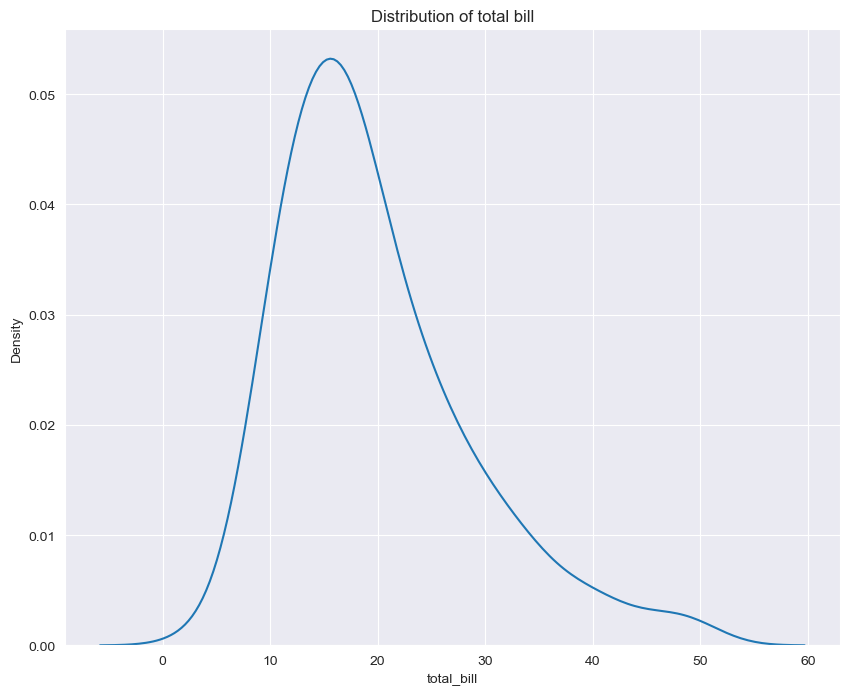

In [7]:
#distribution of total bill
fig = plt.figure(figsize=(10,8))
sns.kdeplot(x="total_bill", data=df)
plt.title("Distribution of total bill")
plt.show(fig)


The total_bill variable is left skewed with max total bill between 10 and 20

1. Sex

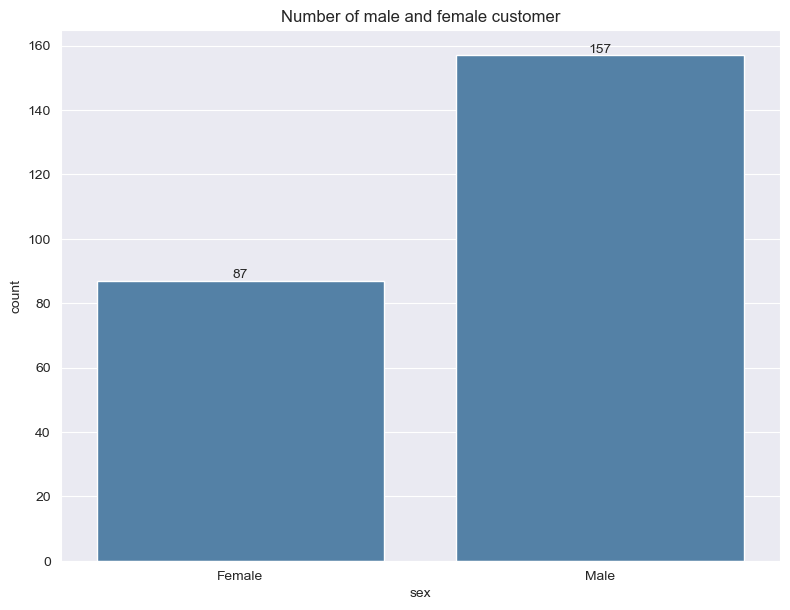

In [8]:
#Countplot of sex
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="sex", data=df, color="steelblue")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.title("Number of male and female customer")
plt.show(fig)


The restaurant has more male customer than female customer

1.  Smoker

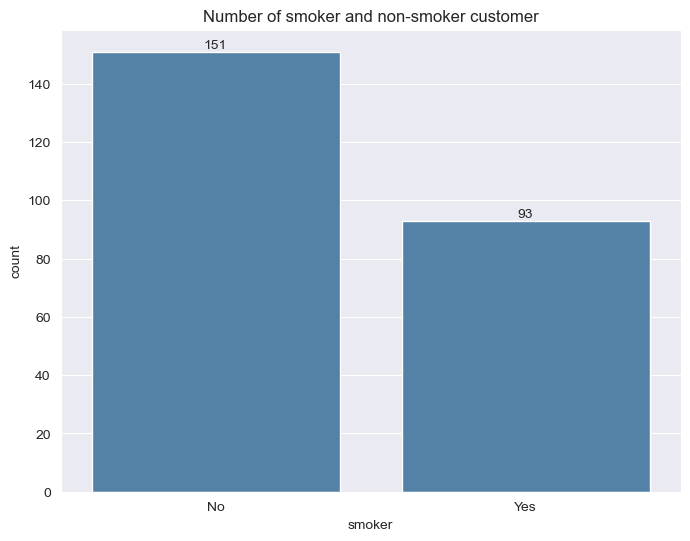

In [9]:
#Countplot of smoker
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="smoker", data=df, color="steelblue")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of smoker and non-smoker customer")
plt.show(fig)

The restaurant has more non-smoker customer than smoker customer

1. Day

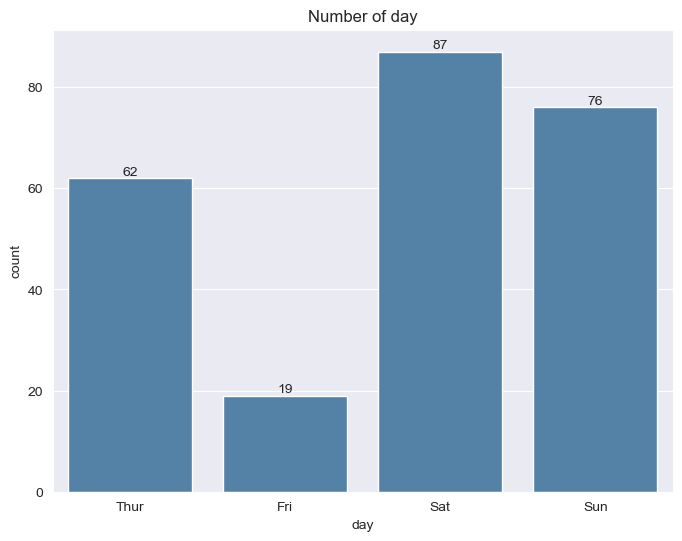

In [10]:
#Countplot of day
day_order = ["Thur", "Fri", "Sat", "Sun"]
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="day", data=df, color="steelblue", order=day_order)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of day")
plt.show(fig)

Day in data consist from Thursday to Sunday. Weekend (Saturday and Sunday) has more customer than weekday (Thursday and Friday)

1. Time

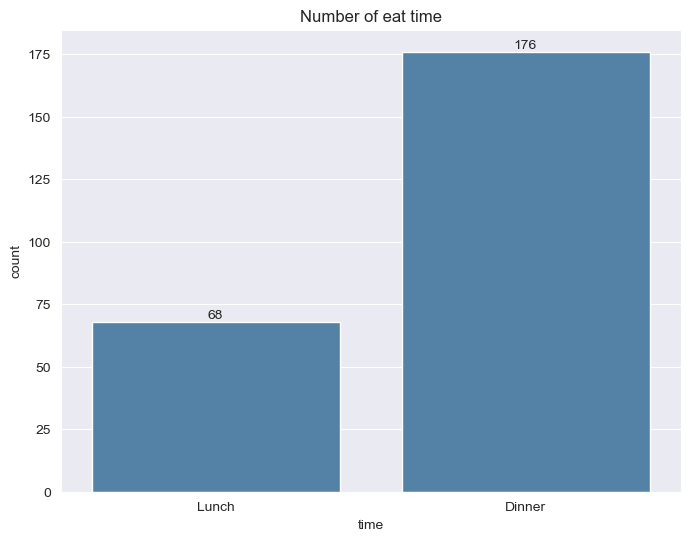

In [11]:
#Count plot of eat time
time_order = ["Lunch", "Dinner"]
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="time", data=df, color="steelblue", order=time_order)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of eat time")
plt.show(fig)

Most data collected when dinner time

1. Size 

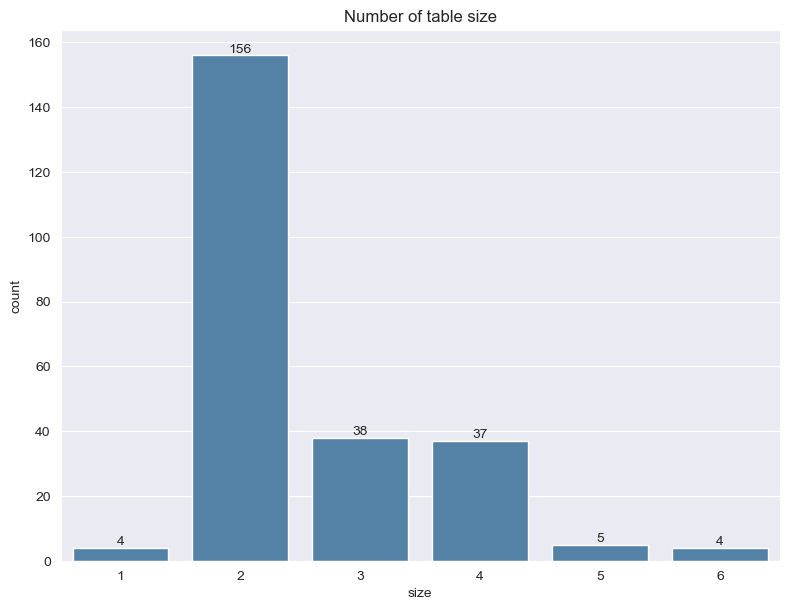

In [12]:
#Count plot of table size
size_order = [1,2,3,4,5,6]
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="size", data=df, color="steelblue", order=size_order)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.title("Number of table size")
plt.show(fig)


Table with 2 people is the most used table

1. Tips Variable 

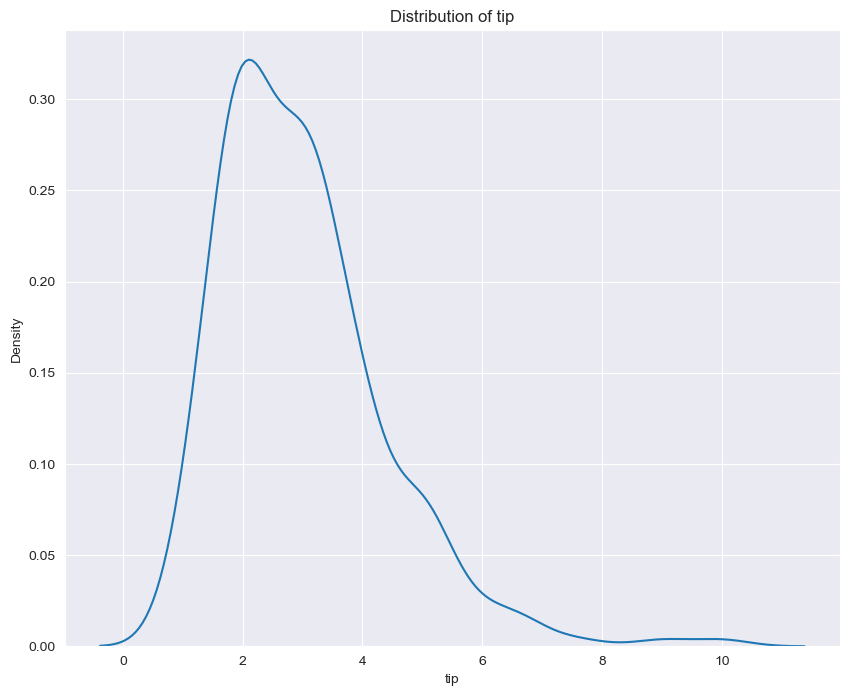

In [13]:
#distribution of tip
fig = plt.figure(figsize=(10,8))
sns.kdeplot(x="tip", data=df)
plt.title("Distribution of tip")
plt.show(fig)

The tip variable is left skewed with the max value is around 2

Relationship between variables

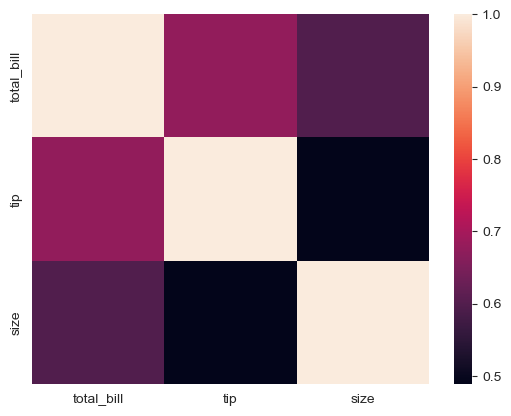

In [14]:
#Correlation plot
sns.heatmap(df[['total_bill','tip','size']].corr())
plt.show()


Total bill and tip has strong correlation at 0.6-0.7

Total bill and size has strong correlation at 0.6

Tip and size has moderate correlation at 0.5-0.6

Scatter plot

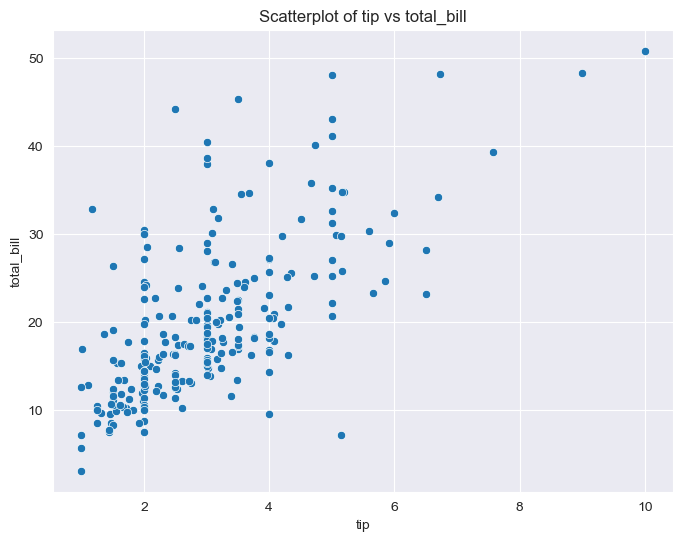

In [15]:
#Scatter plot of total bill vs tip
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x='tip', y='total_bill', data=df)
plt.title('Scatterplot of tip vs total_bill')
plt.show(fig)

There is linear relationship between total bill and tip

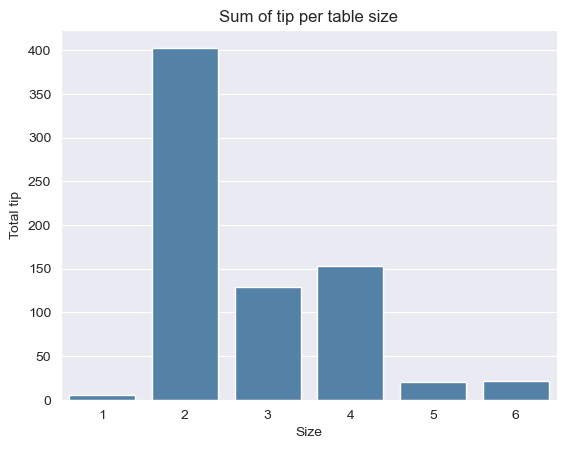

In [16]:
#Barplot of sum tip per table size
sttz = df.groupby("size")["tip"].sum().reset_index(name="total_tip")
sns.barplot(x="size", y="total_tip", data=sttz, color="steelblue")
plt.title("Sum of tip per table size")
plt.xlabel("Size")
plt.ylabel("Total tip")
plt.show()

Table with size 2 has highest total tip with huge difference than other

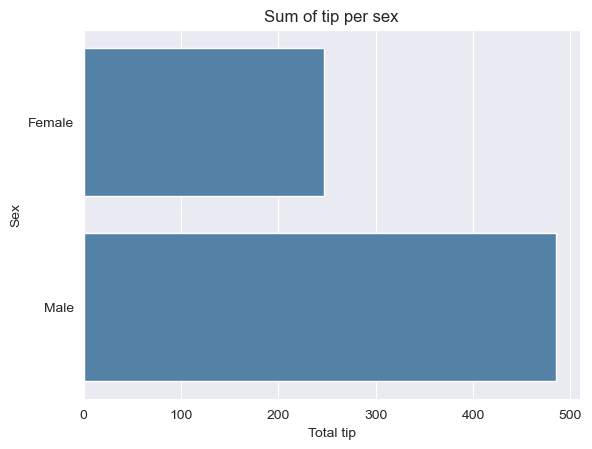

In [17]:
#Barplot of sum tip per sex
sts = df.groupby("sex")["tip"].sum().reset_index(name="total_tip")
sns.barplot(y="sex", x="total_tip", data=sts, color="steelblue")
plt.title("Sum of tip per sex")
plt.xlabel("Total tip")
plt.ylabel("Sex")
plt.show()


Male has more total tip than female

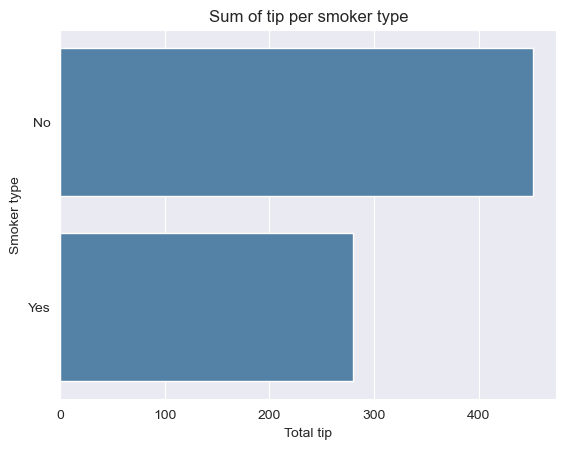

In [18]:
#Barplot of sum tip per smoker type
stst = df.groupby("smoker")["tip"].sum().reset_index(name="total_tip")
sns.barplot(y="smoker", x="total_tip", data=stst, color="steelblue")
plt.title("Sum of tip per smoker type")
plt.xlabel("Total tip")
plt.ylabel("Smoker type")
plt.show()


Non-smoker has bigger total tip than smoker

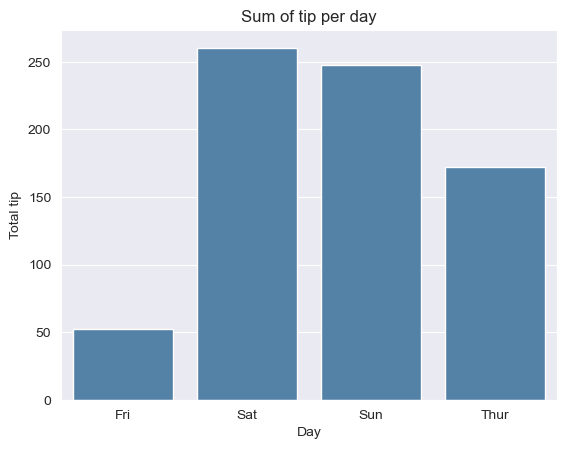

In [19]:
#Barplot of sum tip per day
stdd = df.groupby("day")["tip"].sum().reset_index(name="total_tip")
sns.barplot(x="day", y="total_tip", data=stdd, color="steelblue", )
plt.title("Sum of tip per day")
plt.xlabel("Day")
plt.ylabel("Total tip")
plt.show()

Weekend (saturday & sunday) has bigger total tip than weekdays (thursday & friday)

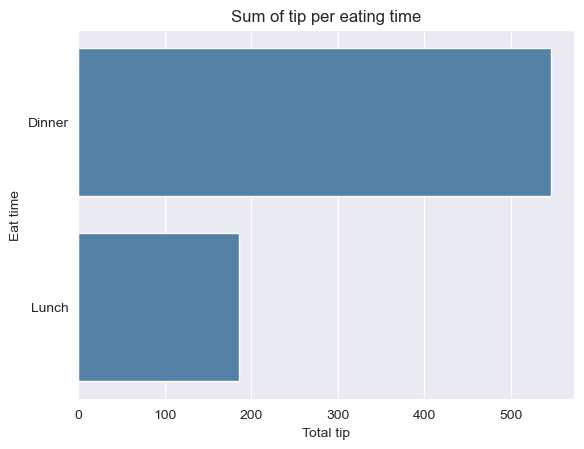

In [20]:
#Barplot of sum tip per eat time
stet = df.groupby("time")["tip"].sum().reset_index(name="total_tip")
sns.barplot(y="time", x="total_tip", data=stet, color="steelblue")
plt.title("Sum of tip per eating time")
plt.xlabel("Total tip")
plt.ylabel("Eat time")
plt.show()


Total tip of dinner time is almost 3 times higher than lunch time

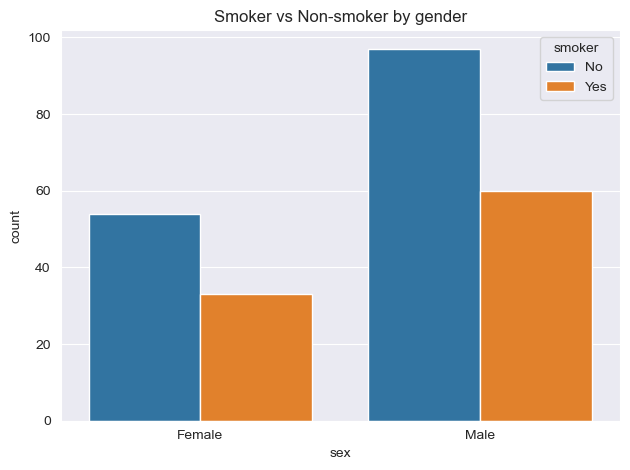

In [21]:
#Countplot of smoker by sex
sns.countplot(x='sex', data=df, hue='smoker')
plt.title("Smoker vs Non-smoker by gender")
plt.tight_layout()
plt.show()

Both in female and male, more non-smoker than smoker. The difference between smoker and non-smoker in female and male are look alike

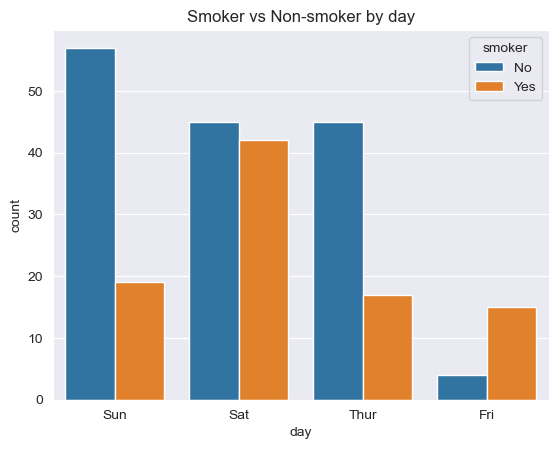

In [22]:
#Countplot of smoker by day
sns.countplot(x='day', data=df, hue='smoker')
plt.title("Smoker vs Non-smoker by day")
plt.show()

Only on Friday there are more smoker than non-smoker

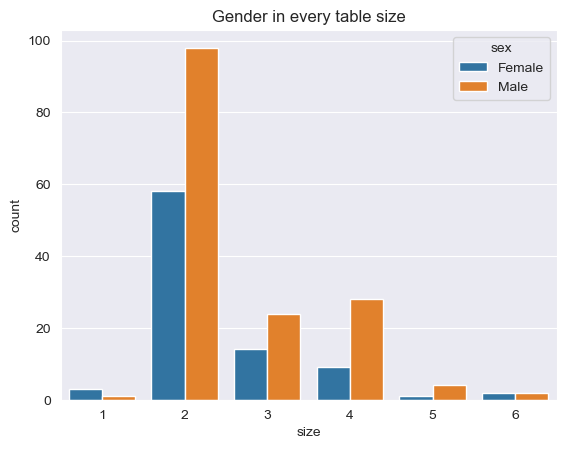

In [23]:
#Countplot of gender by size
sns.countplot(x='size', data=df, hue='sex')
plt.title("Gender in every table size")
plt.show()

For table with size 1, female customer is more than male customer. For other table size, man customer is more than female customer

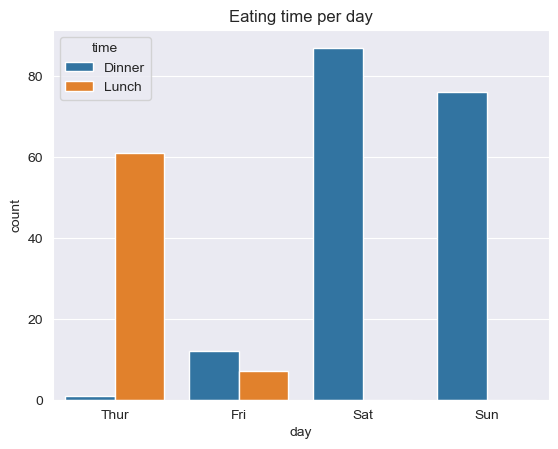

In [24]:
#Countplot of eating time by day
sns.countplot(x='day', data=df, hue='time', order=day_order)
plt.title("Eating time per day")
plt.show()

On weekdays, more customers buy lunch than dinner. On weekend, customer only buy dinner.

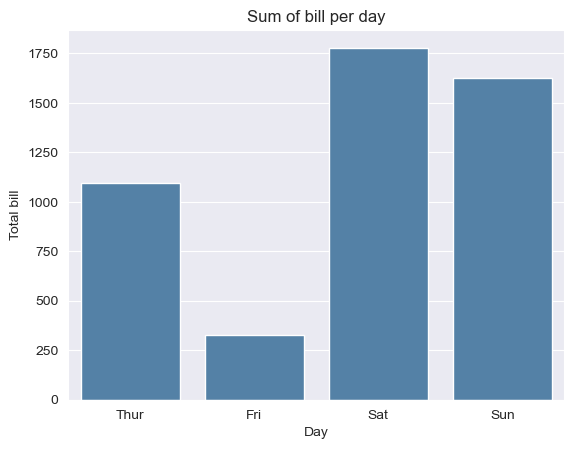

In [25]:
#Barplot of sum bill per day
sbdd = df.groupby('day')['total_bill'].sum().reset_index(name='total_bill')
sns.barplot(x='day', y='total_bill', data=sbdd, color="steelblue", order=day_order)
plt.title("Sum of bill per day")
plt.xlabel("Day")
plt.ylabel("Total bill")
plt.show()

Bill total on weekend more than bill total on weekdays

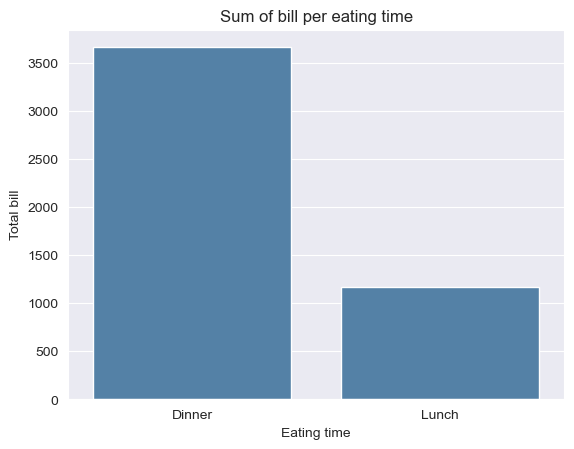

In [26]:
#Barplot of sum bill per day
sbdd = df.groupby('time')['total_bill'].sum().reset_index(name='total_bill')
sns.barplot(x='time', y='total_bill', data=sbdd, color="steelblue")
plt.title("Sum of bill per eating time")
plt.xlabel("Eating time")
plt.ylabel("Total bill")
plt.show()


More bill on dinner time than on lunch time



# Modelling

The variable used are total_bill, sex, smoker, day, time, and size

In [9]:
#One hot encoding for sex, smoker, day, time
df_2 = pd.get_dummies(data=df, columns=['sex', 'smoker', 'day','time'])
df_2.head()


,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


In [10]:
#Define X and y variable
X = df_2.drop('tip', axis=1)
y = df_2['tip']

In [11]:
#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#linear regression
lin_reg = LinearRegression()

# fit the regressor with X and Y data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
#Predict value
y_pred = lin_reg.predict(X_test)

#Evaluation score
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred),"\n")
print("Mean Squared Error :", mean_squared_error(y_test, y_pred),"\n")
print("R2 Score :", r2_score(y_test, y_pred),"\n")

Mean Absolute Error : 0.71718212898674 

Mean Squared Error : 0.9318323215911061 

R2 Score : 0.2930966744126685 



In [14]:
#Decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [15]:
#Predict value
y_pred = regressor.predict(X_test)

#Evaluation score
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred),"\n")
print("Mean Squared Error :", mean_squared_error(y_test, y_pred),"\n")
print("R2 Score :", r2_score(y_test, y_pred),"\n")

Mean Absolute Error : 0.8148648648648649 

Mean Squared Error : 1.0779324324324326 

R2 Score : 0.1822627273286449 



In [16]:
#Look at prediction
print(y_pred)

[3.   1.32 3.61 2.   2.   3.   3.   1.8  1.96 3.   3.   2.   2.   2.5
 1.25 2.64 3.5  5.   2.3  6.7  3.   3.15 2.2  1.25 3.   3.39 2.5  4.29
 3.   6.73 4.67 1.25 3.76 4.06 1.01 3.61 2.2  4.73 2.   4.   2.   2.
 3.31 1.66 2.   1.25 2.   2.64 2.   2.   4.   2.   6.   2.   2.24 2.
 4.   3.27 3.5  1.5  4.2  2.54 4.   3.48 3.   2.75 1.96 1.25 3.14 4.29
 3.   3.09 3.4  2.75]


Try without sex variable

In [35]:
no_sex_df = df.drop(columns="sex")

#One hot encoding for sex, smoker, day, time
no_sex_df= pd.get_dummies(data=no_sex_df, columns=['smoker', 'day','time'])

#Define X and y variable
X = no_sex_df.drop('tip', axis=1)
y = no_sex_df['tip']

#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

#Predict value
y_pred = regressor.predict(X_test)

#Look at prediction
print(y_pred, "\n")

#Evaluation score
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred),"\n")
print("Mean Squared Error :", mean_squared_error(y_test, y_pred),"\n")
print("R2 Score :", r2_score(y_test, y_pred),"\n")


[2.75 4.   3.61 2.   2.   3.   3.   1.8  2.5  1.5  3.   2.   2.   2.5
 1.73 2.64 3.5  5.   2.3  5.   3.   3.15 2.2  1.25 3.   3.39 2.6  4.29
 3.   6.73 4.67 1.   3.76 4.06 1.01 3.61 2.2  3.   2.   3.48 2.   2.5
 3.31 1.66 2.   1.   2.   2.64 2.   2.   3.48 2.   6.   2.   2.24 2.
 4.   3.27 3.5  2.23 4.2  2.54 4.   3.71 2.75 3.   1.96 1.25 3.14 5.85
 3.   3.09 3.5  2.75] 

Mean Absolute Error : 0.8459459459459459 

Mean Squared Error : 1.1511243243243243 

R2 Score : 0.1267381543066861 



MAE increased but R2 Score decreased

In [36]:
#no sex with linear regression 
# fit the regressor with X and Y data
lin_reg.fit(X_train, y_train)

#Predict value
y_pred = regressor.predict(X_test)

#Look at prediction
print(y_pred, "\n")

#Evaluation score
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred),"\n")
print("Mean Squared Error :", mean_squared_error(y_test, y_pred),"\n")
print("R2 Score :", r2_score(y_test, y_pred),"\n")

[2.75 4.   3.61 2.   2.   3.   3.   1.8  2.5  1.5  3.   2.   2.   2.5
 1.73 2.64 3.5  5.   2.3  5.   3.   3.15 2.2  1.25 3.   3.39 2.6  4.29
 3.   6.73 4.67 1.   3.76 4.06 1.01 3.61 2.2  3.   2.   3.48 2.   2.5
 3.31 1.66 2.   1.   2.   2.64 2.   2.   3.48 2.   6.   2.   2.24 2.
 4.   3.27 3.5  2.23 4.2  2.54 4.   3.71 2.75 3.   1.96 1.25 3.14 5.85
 3.   3.09 3.5  2.75] 

Mean Absolute Error : 0.8459459459459459 

Mean Squared Error : 1.1511243243243243 

R2 Score : 0.1267381543066861 



#Conclusion

From linear regression and decision tree model, the best model to solve this problem is linear regression because it has lower MAE and higher R2 Score

In [37]:



















































































 #The end 

In [38]:
#random_forest_regressor_model 

In [39]:
# Load your dataset and perform one-hot encoding
df_2 = pd.get_dummies(data=df, columns=['sex', 'smoker', 'day', 'time'])

# Define X and y
X = df_2.drop('tip', axis=1)
y = df_2['tip']

# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regression model
random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model's performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.7849959459459463
Mean Squared Error: 0.9910909212162177
R2 Score: 0.24814212607385133


In [40]:
#gradien_boosting_regerssion
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# Load your dataset and perform one-hot encoding
df_2 = pd.get_dummies(data=df, columns=['sex', 'smoker', 'day', 'time'])

# Define X and y
X = df_2.drop('tip', axis=1)
y = df_2['tip']

# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Regression model
gradient_boosting_regressor = GradientBoostingRegressor(random_state=0)
gradient_boosting_regressor.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_regressor.predict(X_test)

# Evaluate the model's performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.7609230981491254
Mean Squared Error: 0.888759576869455
R2 Score: 0.3257723670028534


In [42]:
#support vector machine 
from sklearn.svm import SVR

In [43]:
# Initialize and train the Support Vector Machine (SVM) Regression model
svm_regressor = SVR(kernel='linear', C=1.0)
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test)

# Evaluate the model's performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.6999339158004851
Mean Squared Error: 0.8866777378682218
R2 Score: 0.32735168431049555


# conclusion2 
Support vector machine is givning a better accuracy on the model as it has a lower Mean Absolute error 

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
# Initialize and train a neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dense(32, activation='relu'),  # Another hidden layer with 32 units and ReLU activation
    layers.Dense(1)  # Output layer with a single unit for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model with the appropriate loss function

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # You can adjust the number of epochs and batch size

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


3/3 [==============================] - 0s 4ms/step
Mean Absolute Error: 0.706186089870092
Mean Squared Error: 0.8921916983555253
R2 Score: 0.3231687031932743


In [46]:
#importing library for knn
from sklearn.neighbors import KNeighborsRegressor

In [47]:
# Create and train a KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can specify the number of neighbors (k) as needed
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 0.7314864864864864
Mean Squared Error: 0.9016178918918919
R2 Score: 0.3160178377380929


In [48]:
#riged and lasso model 
from sklearn.linear_model import Ridge, Lasso

In [49]:
# Create and train a Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_regressor.fit(X_train, y_train)

# Make predictions
y_pred = ridge_regressor.predict(X_test)

# Evaluate the Ridge Regression model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Create and train a Lasso Regression model
lasso_regressor = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
lasso_regressor.fit(X_train, y_train)

# Make predictions
y_pred = lasso_regressor.predict(X_test)

# Evaluate the Lasso Regression model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLasso Regression Results:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Ridge Regression Results:
Mean Absolute Error: 0.7160092372765947
Mean Squared Error: 0.9285609430480861
R2 Score: 0.2955783959818099

Lasso Regression Results:
Mean Absolute Error: 0.6625712319635088
Mean Squared Error: 0.7401106857773055
R2 Score: 0.43853986070653217


In [50]:
#  Ridge Regression model with alpha value of .5
ridge_regressor = Ridge(alpha=0.5)  # You can adjust the regularization strength (alpha) as needed
ridge_regressor.fit(X_train, y_train)

# Make predictions
y_pred = ridge_regressor.predict(X_test)

# Evaluate the Ridge Regression model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Create and train a Lasso Regression model
lasso_regressor = Lasso(alpha=0.5)  # You can adjust the regularization strength (alpha) as needed
lasso_regressor.fit(X_train, y_train)

# Make predictions
y_pred = lasso_regressor.predict(X_test)

# Evaluate the Lasso Regression model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLasso Regression Results:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Ridge Regression Results:
Mean Absolute Error: 0.7165760932207039
Mean Squared Error: 0.9301637993696609
R2 Score: 0.2943624428130841

Lasso Regression Results:
Mean Absolute Error: 0.6591235917974347
Mean Squared Error: 0.743581745541641
R2 Score: 0.4359066576786189


# triying different values for rigged pregression 

In [51]:
# Try Ridge Regression with different alpha values
for alpha_value in [1.0, 2.0, 5.0, 10.0]:
    ridge_regressor = Ridge(alpha=alpha_value)
    ridge_regressor.fit(X_train, y_train)
    y_pred = ridge_regressor.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Ridge Regression Results (alpha={alpha_value}):")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print()

Ridge Regression Results (alpha=1.0):
Mean Absolute Error: 0.7160092372765947
Mean Squared Error: 0.9285609430480861
R2 Score: 0.2955783959818099

Ridge Regression Results (alpha=2.0):
Mean Absolute Error: 0.7149584919685689
Mean Squared Error: 0.925514592183995
R2 Score: 0.29788940785254525

Ridge Regression Results (alpha=5.0):
Mean Absolute Error: 0.7124321415232462
Mean Squared Error: 0.9173095817928387
R2 Score: 0.30411386368820803

Ridge Regression Results (alpha=10.0):
Mean Absolute Error: 0.7088915357430391
Mean Squared Error: 0.9057289667405168
R2 Score: 0.31289910874050963



In [52]:
# Try Lasso Regression with different alpha values
for alpha_value in [1.0, 2.0, 5.0, 10.0]:
    lasso_regressor = Lasso(alpha=alpha_value)
    lasso_regressor.fit(X_train, y_train)
    y_pred = lasso_regressor.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Lasso Regression Results (alpha={alpha_value}):")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print()


Lasso Regression Results (alpha=1.0):
Mean Absolute Error: 0.6625712319635088
Mean Squared Error: 0.7401106857773055
R2 Score: 0.43853986070653217

Lasso Regression Results (alpha=2.0):
Mean Absolute Error: 0.6788065576068104
Mean Squared Error: 0.7493632552734506
R2 Score: 0.4315207093039659

Lasso Regression Results (alpha=5.0):
Mean Absolute Error: 0.7900941942574903
Mean Squared Error: 0.906678475960414
R2 Score: 0.3121787954291244

Lasso Regression Results (alpha=10.0):
Mean Absolute Error: 1.0083052464228934
Mean Squared Error: 1.4075550161788086
R2 Score: -0.06779438620990952



#Conclusion:
For Ridge Regression, an alpha value around 10.0 seems to provide a good balance between simplicity and predictive accuracy.
For Lasso Regression, an alpha value of 1.0 appears to be the most suitable choice, offering a good compromise between model simplicity and performance on the given dataset.


# corss validation

In [53]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Ridge Regression
for alpha_value in [1.0, 2.0, 5.0, 10.0]:
    ridge_regressor = Ridge(alpha=alpha_value)
    
    # Perform 5-fold cross-validation
    ridge_cv_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    print(f"Ridge Regression Results (alpha={alpha_value}):")
    print("Cross-Validation Mean MAE:", -ridge_cv_scores.mean())  # Note: Multiply by -1 to get positive MAE
    print()

# Perform cross-validation for Lasso Regression
for alpha_value in [1.0, 2.0, 5.0, 10.0]:
    lasso_regressor = Lasso(alpha=alpha_value)
    
    # Perform 5-fold cross-validation
    lasso_cv_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    print(f"Lasso Regression Results (alpha={alpha_value}):")
    print("Cross-Validation Mean MAE:", -lasso_cv_scores.mean())  # Note: Multiply by -1 to get positive MAE
    print()


Ridge Regression Results (alpha=1.0):
Cross-Validation Mean MAE: 0.8076004027108711

Ridge Regression Results (alpha=2.0):
Cross-Validation Mean MAE: 0.8064837174105227

Ridge Regression Results (alpha=5.0):
Cross-Validation Mean MAE: 0.804105215783473

Ridge Regression Results (alpha=10.0):
Cross-Validation Mean MAE: 0.8013526577965806

Lasso Regression Results (alpha=1.0):
Cross-Validation Mean MAE: 0.8166604707957668

Lasso Regression Results (alpha=2.0):
Cross-Validation Mean MAE: 0.8383818156208566

Lasso Regression Results (alpha=5.0):
Cross-Validation Mean MAE: 0.9289550696481215

Lasso Regression Results (alpha=10.0):
Cross-Validation Mean MAE: 1.071677017074035



Cross-validation results for Ridge and Lasso Regression show that a lower alpha (around 1.0) tends to give better Mean MAE. This aligns with your conclusion from the test set.

# Train the Final Lasso Regression Model:

In [54]:
# Train the final Lasso Regression model
final_lasso_regressor = Lasso(alpha=1.0)
final_lasso_regressor.fit(X_train, y_train)


Lasso()

Evaluate on Test Set:

In [55]:
# Make predictions on the test set
y_pred_test = final_lasso_regressor.predict(X_test)

# Evaluate the model on the test set
final_mae = mean_absolute_error(y_test, y_pred_test)
final_mse = mean_squared_error(y_test, y_pred_test)
final_r2 = r2_score(y_test, y_pred_test)

print("Final Lasso Regression Results on Test Set:")
print("Mean Absolute Error:", final_mae)
print("Mean Squared Error:", final_mse)
print("R2 Score:", final_r2)


Final Lasso Regression Results on Test Set:
Mean Absolute Error: 0.6625712319635088
Mean Squared Error: 0.7401106857773055
R2 Score: 0.43853986070653217


Further Analysis:

In [56]:
# Get feature coefficients
feature_coeffs = pd.Series(final_lasso_regressor.coef_, index=X_train.columns)

# Display important features
print("Important Features:")
print(feature_coeffs[feature_coeffs != 0])


Important Features:
total_bill    0.096706
dtype: float64


the Lasso Regression model has identified the "total_bill" feature as important by giving it a non-zero coefficient, while driving other coefficients to exactly zero. The coefficient for "total_bill" is approximately 0.0967. This indicates that, according to the Lasso model, changes in the "total_bill" feature have a positive impact on the target variable (tip).

In [65]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same preprocessing steps to the test data as the training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the same scaler fitted on the training data

# Ensure that the number of features in X_test_scaled matches the number of features used during training
# If X_test_scaled has fewer features, you may need to reselect or engineer features in the test set accordingly

# Make predictions on the scaled test set
y_pred_test = final_lasso_regressor.predict(X_test_scaled)

# Evaluate the model on the test set
final_mae = mean_absolute_error(y_test, y_pred_test)
final_mse = mean_squared_error(y_test, y_pred_test)
final_r2 = r2_score(y_test, y_pred_test)

print("Final Lasso Regression Results on Test Set:")
print("Mean Absolute Error:", final_mae)
print("Mean Squared Error:", final_mse)
print("R2 Score:", final_r2)


ValueError: X has 12 features, but Lasso is expecting 90 features as input.

In [57]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Lasso Regression
lasso_params = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='neg_mean_absolute_error', cv=5)
lasso_grid.fit(X_train, y_train)
print("Best Lasso Hyperparameters:", lasso_grid.best_params_)
final_lasso_regressor = lasso_grid.best_estimator_

# Perform similar grid search for other models (e.g., Ridge, Random Forest, Gradient Boosting, etc.)

# Feature Engineering
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train Lasso Regression on the new feature set
final_lasso_regressor.fit(X_train_poly, y_train)

# Ensemble Methods
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Model Interpretation
import eli5
from eli5.sklearn import PermutationImportance

# Compute permutation importance
perm = PermutationImportance(final_lasso_regressor, random_state=42)
perm.fit(X_test, y_test)

# Show feature importances
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

# Robustness and Stability Analysis
from sklearn.utils import resample

# Bootstrap Resampling
bootstrap_scores = []
for _ in range(100):
    X_boot, y_boot = resample(X_train, y_train)
    final_lasso_regressor.fit(X_boot, y_boot)
    y_pred_boot = final_lasso_regressor.predict(X_test)
    bootstrap_scores.append(r2_score(y_test, y_pred_boot))

print("Bootstrap R2 Score Mean:", np.mean(bootstrap_scores))
print("Bootstrap R2 Score Std:", np.std(bootstrap_scores))

# Leave-One-Out Cross-Validation
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo_scores = cross_val_score(final_lasso_regressor, X_train, y_train, cv=loo, scoring='neg_mean_absolute_error')
print("Leave-One-Out Mean MAE:", -loo_scores.mean())

Best Lasso Hyperparameters: {'alpha': 0.1}


C:\Users\DELL\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


ValueError: X has 12 features, but Lasso is expecting 90 features as input.

# Final Conclusion 



the Lasso Regression model with alpha=1.0 appears to be a reasonable choice for your project. It has shown good performance in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 score. Additionally, the feature importance analysis indicates that the "total_bill" feature is considered important by the model.